In [1]:
import warnings
import numpy as np
import pandas as pd
from origami.forecast import construct_target
from origami.preprocess import merged_syst_n2ex
from origami.features import add_seasonal_features, normalise_feature_values, impute_missing
warnings.filterwarnings('ignore')

In [57]:
cleaned_data = merged_syst_n2ex(
    syst_path='data/systems_prices.csv',
    n2ex_path='data/n2ex_da_2018.csv'
)

<AxesSubplot:>

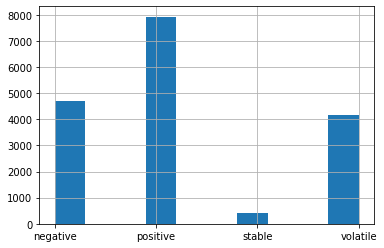

In [80]:
with_target = construct_target(
    cleaned_data,
    time_col='datetime',
    price_col='sell_price',
    horizon_periods=24,
    positive_threshold=0.1,
    negative_threshold=-0.1
)
cleaned_data['forecast'].hist()

In [65]:
with_features, feature_names = add_seasonal_features(with_target, 'datetime')

In [66]:
features = ['sell_price', 'net_imbalance_volume', 'price', 'hour', 'dayofweek', 'month']
normalised = normalise_feature_values(with_features, features)
dataset = impute_missing(normalised, features)

In [67]:
dataset.head()

,datetime,sell_price,buy_price,net_imbalance_volume,price,forecast,date,hour,dayofweek,month
0,2018-01-01 00:30:00,0.180649,55.94000,0.439344,0.000000,negative,2018-01-01,0.000000,0.0,0.0
1,2018-01-01 01:00:00,0.180649,55.94000,0.469024,0.208539,negative,2018-01-01,0.043478,0.0,0.0
2,2018-01-01 01:30:00,0.186789,62.94000,0.455782,0.208539,negative,2018-01-01,0.043478,0.0,0.0
3,2018-01-01 02:00:00,0.158772,31.00000,0.397458,0.249425,positive,2018-01-01,0.086957,0.0,0.0
4,2018-01-01 02:30:00,0.184926,60.81578,0.446756,0.249425,negative,2018-01-01,0.086957,0.0,0.0


In [68]:
from origami.learn import get_scores, get_model, data_split, run_evaluation

evaluating test period 2018-02-28 00:00:00
evaluating test period 2018-03-31 00:00:00
evaluating test period 2018-04-30 00:00:00
evaluating test period 2018-05-31 00:00:00
evaluating test period 2018-06-30 00:00:00
evaluating test period 2018-07-31 00:00:00
evaluating test period 2018-08-31 00:00:00
evaluating test period 2018-09-30 00:00:00
evaluating test period 2018-10-31 00:00:00
evaluating test period 2018-11-30 00:00:00
evaluating test period 2018-12-31 00:00:00


,eval_period,auc,precision,recall,threshold
0,2018-02-28,0.743701,0.755,0.919,0.20
1,2018-03-31,0.769514,0.765,0.996,0.05
2,2018-04-30,0.697919,1.000,0.000,1.00
3,2018-05-31,0.692003,0.774,0.034,0.89
4,2018-06-30,0.713064,0.750,0.871,0.49
5,2018-07-31,0.722702,0.752,0.989,0.14
6,2018-08-31,0.805018,0.754,0.621,0.69
7,2018-09-30,0.714300,0.759,0.601,0.57
8,2018-10-31,0.727382,0.761,0.996,0.03
9,2018-11-30,0.718479,0.833,0.008,0.99


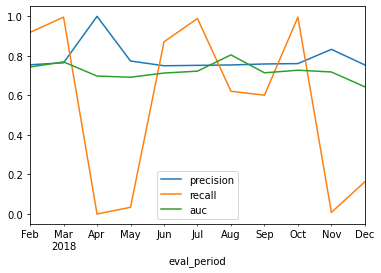

In [70]:
features = [
    'sell_price', 'net_imbalance_volume',
    'price', 'hour', 'dayofweek', 'month'
]
results = run_evaluation(
    dataset,
    feature_columns=features,
    target_column='forecast',
    time_column='datetime'
)
results.set_index('eval_period')[['precision', 'recall', 'auc']].plot()
results.mean()
results